# Assess Mental State Changes with Remote Photoplethysmography and Thermal Imaging

This notebook replicates all steps in the article.

In [1]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, sys.path[0]+"/../")
from researchtoolbox.utility import preprocessing as pre
from researchtoolbox.remote_ppg import analysis as als
from researchtoolbox.visualization import chart as vis
from researchtoolbox.constant_variable import *

target_folder_path = '../result/remote_ppg/'
input_file_path = os.path.join(target_folder_path, "bpm_output","summary","result.csv")
save_path = os.path.join("../result/remote_ppg/bpm_output","summary","result_updated.csv")

### R-PPG

HR_difference	1.288	0.003
SDNN_difference	3.474	0.313
rMSSD_difference	0.234	0.892
pNN50_difference	-1.296	0.247
ln(HF)_difference	-0.102	0.394
ln(LF)_difference	-0.172	0.208
ln(LF/HF)_difference	-0.096	0.456

[[  1.63332343 -12.41805936  -5.44626578  -3.74834498  -0.40660249
   -0.49454535  -0.0715914 ]
 [  0.34500664 -15.89201987  -5.68026388  -2.45231619  -0.30472276
   -0.3220504    0.02483015]
 [  1.28831679   3.47396051   0.2339981   -1.29602879  -0.10187973
   -0.17249494  -0.09642155]]
[[3.78014956e-06 5.20268448e-07 1.42953747e-05 3.76303694e-06
  1.54849394e-05 1.24626101e-06 4.17281182e-01]
 [2.01547316e-01 2.11855945e-07 5.02810669e-05 4.77986042e-03
  2.25504865e-04 2.25576047e-03 7.90745158e-01]
 [3.08197935e-03 3.12678283e-01 8.92048363e-01 2.46510717e-01
  3.93789728e-01 2.08180197e-01 4.55768877e-01]]


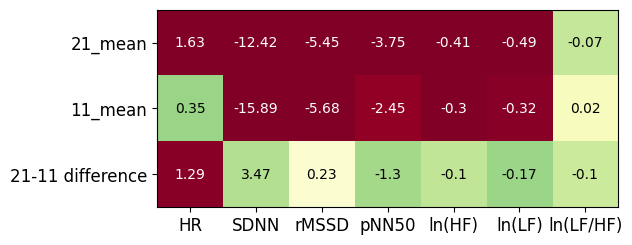

In [2]:
group_1 = 21
group_2 = 11

df = als.PreAnalysis().process(input_file_path, save_path)  # Prepare input data frame for r-PPG analysis
# df = pd.read_csv(save_path)

df_seq0 = df[df["Seq"] == 0]
df_seq0, _ = pre.Outlier().get_outliers(df_seq0, hrv_difference_index)

v = vis.HeatPlot().single_ROI(df_seq0, hrv_variable_list, group_1, group_2)